# 3.8 Linear Models: Initial-Value Problems

## 範例 2 彈簧質量系統：Free Damped Motion

一彈簧質量系統，物體質量為 $m\,\mathrm{kg}$，彈簧係數為 $k\,\mathrm{N/m}$，阻尼係數為 $\beta\,\mathrm{Ns/m}$，其運動方程式為

$$
x'' + \frac{\beta}{m} x' + \frac{k}{m}x = 0
$$

或

$$
x'' + 2\lambda x' + \omega^2 x = 0
$$

其中

$$
2\lambda = \frac{\beta}{m},\quad \omega^2 = \frac{k}{m}
$$

### 過阻尼 (overdamped) 運動

設定 $m = 2\,\mathrm{kg}$, $\beta = 10\,\mathrm{Ns/m}$, $k = 8\,\mathrm{N/m}$。即

$$
x'' + 5x' + 4x = 0
$$

初始條件為當時間 $t = 0\,\mathrm{s}$ 時，位移量為 $1\,\mathrm{m}$, 速度為 $1\,\mathrm{m/s}$; 亦即 $x(0) = 1$, $x'(0) = 1$:

In [1]:
t = var('t')
x = function('x')(t)
de1 = diff(x,t,2) + 5 * diff(x,t) + 4 * x == 0
de1

4*x(t) + 5*diff(x(t), t) + diff(x(t), t, t) == 0

In [2]:
sol1 = desolve(de1, x, [0,1,1])
sol1

5/3*e^(-t) - 2/3*e^(-4*t)

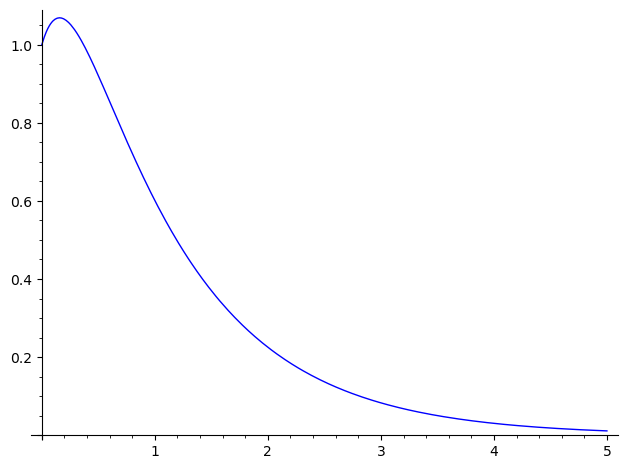

In [3]:
plot(sol1, t, 0, 5)

### 臨界阻尼 (critically damped) 運動

設 $m = 1/4~\mathrm{kg}$, $\beta = 2~\mathrm{Ns/m}$, $k = 4~\mathrm{N/m}$，即

$$
x'' + 8 x' + 16 x = 0
$$

初始條件為時間 $t = 0$ 時處於平衡位置，速度為向上 $-3~\mathrm{m/s}$；亦即 $x(0) = 0$, $x'(0) = -3$:

In [4]:
t = var('t')
x = function('x')(t)
de2 = diff(x,t,2) + 8*diff(x,t) + 16*x == 0
de2

16*x(t) + 8*diff(x(t), t) + diff(x(t), t, t) == 0

In [5]:
sol2 = desolve(de2, x, [0,0,-3])
sol2

-3*t*e^(-4*t)

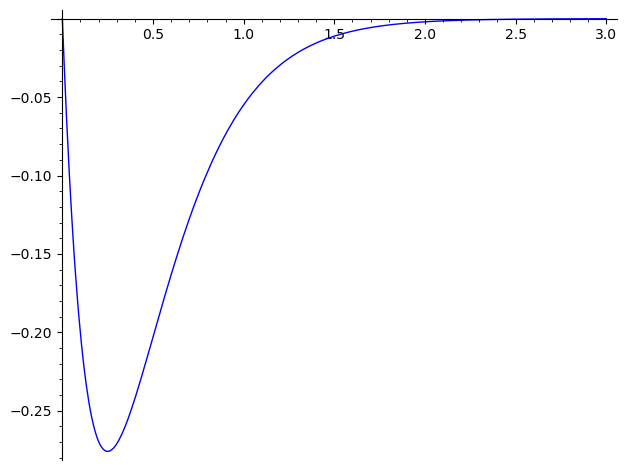

In [6]:
plot(sol2, t, 0, 3)

可發現因為初始速度為向上，故物體一開始為向上運動。達到最高處後因為過阻尼的效應，故逐漸下降至平衡點。

最高處出現的時間，可由曲線的斜率為零，即 $x'(t) = 0$ 求得：

In [7]:
solve(diff(sol2,t) == 0, t)

[t == (1/4)]

將此時間代入 $x(t)$，即可之最高的位置為：

In [8]:
sol2(t=1/4)

-3/4*e^(-1)

其值為：

In [9]:
n(sol2(t=1/4))

-0.275909580878582

即最高位置為平衡點以上 0.276 m 處，出現在時間為 1/4 s 時。

### 欠阻尼 (underdamped) 運動

設 $m = 1/2~\mathrm{kg}$, $\beta = 1~\mathrm{Ns/m}$, $k = 5~\mathrm{N/m}$，即

$$
x'' + 2 x' + 10 x = 0
$$

初始條件為時間 $t = 0$ 時處於平衡位置上方 2 m，速度為 0；亦即 $x(0) = -2$, $x'(0) = 0$:

In [13]:
%display plain
t = var('t')
x = function('x')(t)
de3 = diff(x,t,2) + 2*diff(x,t) + 10*x == 0
de3

10*x(t) + 2*diff(x(t), t) + diff(x(t), t, t) == 0

In [14]:
sol3 = desolve(de3, x, [0,-2,0])
sol3

-2/3*(3*cos(3*t) + sin(3*t))*e^(-t)

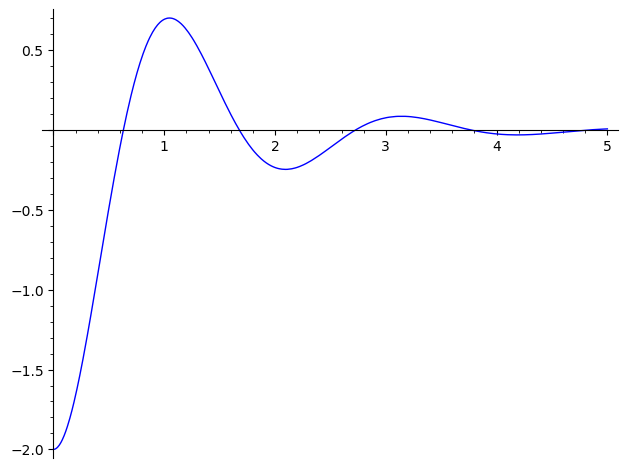

In [15]:
plot(sol3, t, 0, 5)

此解可表為

$$
x(t) = e^{-t}(C_1\cos \omega t + C_2\sin \omega t) = A e^{-t} \sin(\omega t + \phi)
$$

其中 $A = \sqrt{C_1^2+C_2^2}$, 而 $\pm A e^{-t}$ 為振幅之包絡線：

In [16]:
C1 = -2/3 * 3
C2 = -2/3
A = sqrt(C1^2 + C2^2)
A

2/3*sqrt(10)

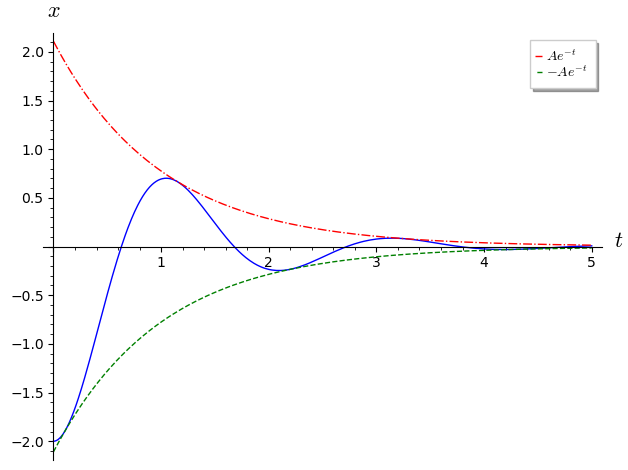

In [23]:
plot1 = plot(sol3, t, 0, 5, axes_labels=['$t$', '$x$'])
plot1 = plot1 + plot(A*exp(-t), t, 0, 5, color='red', linestyle='-.', legend_label='$A e^{-t}$')
plot1 += plot(-A*exp(-t), t, 0, 5, color='green', linestyle='--', legend_label='$-A e^{-t}$')
plot1